# **FIR Filter**
 

*   Mykola Liashuha
*   Jose Gonzalez Lopez



# Introduction
In this work we will use the audio from the previous exercise to create a FIR delay effect. First, we will determine the impulse response of the filter. Next, the frequency response of the filter will be calculated. After that, the delay effect will be applied to the audio. Last, we will conclude the notebook by wraping up all the concepts explored in the exercise.


# Imports

In [1]:
import numpy as np #Numpy for calculations
import sklearn #Use this library to normalize
import math #For calculations
import scipy.signal #Signal library
from scipy.io import wavfile #Read wav files
from matplotlib import pyplot as plt #Plots
from scipy.fft import fft, ifft,fftfreq #Fourier transform

# Auxiliar Functions

In [2]:
'''
Performing delay effect on a particular item
'''
def fir_step(x, a, D, t):
    if t - D < 0:
        return x[t]
    else:
        return x[t] + a*x[t-D]
   
'''
FIR filter with delay effect
'''
def FIR(data, a, D):
    data_new = data.copy().astype('float32')
    for i in range(0, data_new.shape[0]):
        data_new[i] = fir_step(data, a, D, i)
    return data_new
    
'''
Function that returns impulse response in list type
'''
    
def get_impulse_response(D, a):
    res = []
    res.append(1.0)
    
    for i in range(1, D):
        res.append(0)
    res.append(a)
    return res

# The Filter
Our main goal is to implement the following FIR delay effect using the formula:

$s[t]=e[t]+αe[t−D]$

where α is the attenuation factor, $D$ is the time delay, $s$ is the output signal and $e$ the input. Our first objective will be to get the impulse response of the filter ($h[t]$). Let's assume that $α=0.1$ and $D=1$. Our formula now will be:

$s[t]=e[t]+0.1 \cdot e[t−1]$

We will also assume that the signal is causal and stable. Having that:

$s[0]=e[0]$

$s[1]=e[1]+0.1 \cdot e[0]$

$s[2]=e[2]+0.1 \cdot e[1]$

$s[3]=e[3]+0.1 \cdot e[2]$

And so on, then the impulse respond will be:

$h[t]=\delta[t] + \cdot 0.1 \delta[t-1]$

Where $\delta[t]$ is the dirac function. We can get its coefficients:

$h[t] = [1,0.1]$

And we know that the Fourier transform of the impulse respond is the Frecuency Respond of our filter. With that in mind let's do a practical example.

In [3]:
samplerate, data = wavfile.read('string_2.wav') #Read the data stream and get samplerate

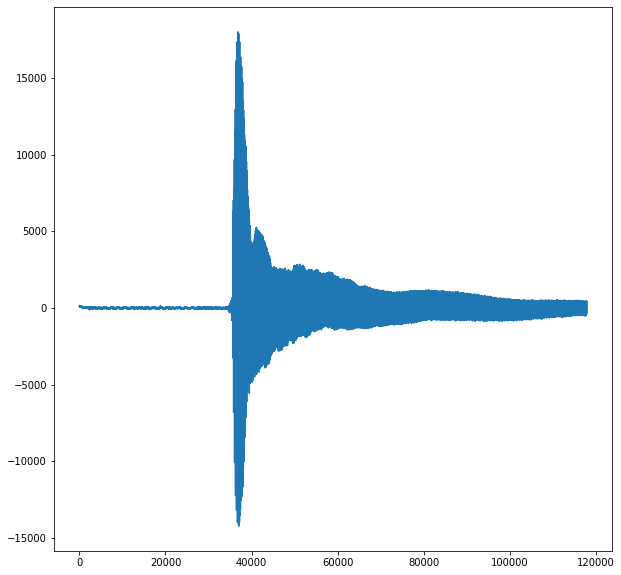

In [4]:
#ORIGINAL AUDIO SIGNAL

plt.figure(figsize=(10,10))
plt.plot(data)

## Applying delay effect to audio signal

In the following part we are going to apply delay effect with FIR using two implementations: our own one and the one from scipy. We are going to compare their performance. For sake of comparison, we compared a very small part of a signal to see whether there is any difference between processed signal and original one, and also to compare both implementations.

### Scipy implementation

Impulse response [1.0, 0, 0, 0.5]


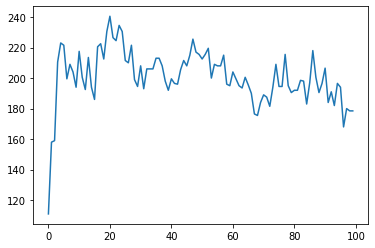

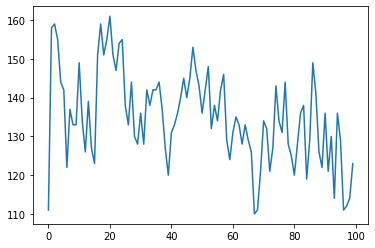

In [5]:
#SCIPY OUTPUT

D = 3
a = 0.5


h = get_impulse_response(D, a)

data_new = data.copy()

print('Impulse response', h)

data_new = scipy.signal.lfilter(h, 1, data)
plt.plot(data_new[:100])
plt.show()

plt.plot(data[:100])
plt.show()

### Own implementation

Impulse response [1.0, 0, 0, 0.5]


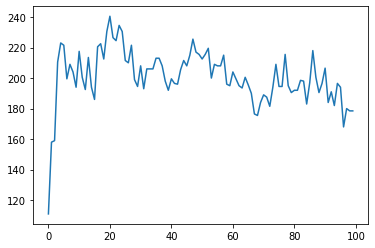

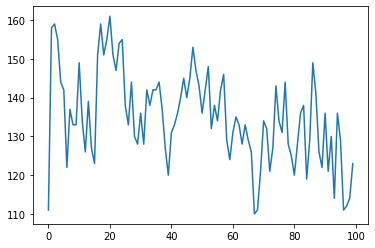

In [6]:
#OUR OWN IMPLEMENTATION OUTPUT

D = 3
a = 0.5

print('Impulse response', get_impulse_response(D, a))

data_new = FIR(data, a, D)

plt.plot(data_new[:100])
plt.show()

plt.plot(data[:100])
plt.show()

As you see above the results from scipy functions and our function are the same. As well as the computation of the impulse resonse performing the delay effect filtering using scipy function.

For example, with delay window of 3 and alpha value of 0.5, we will get such impulse response vector using tthe same reasoning as the example at the beginning:
[1.0, 0, 0, 0.5]

### Outputs
Below we compare outputs from processed signal and original one.

Processed signal
Original signal


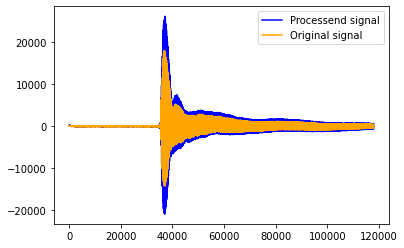

In [7]:
print('Processed signal')
plt.plot(data_new, c='blue', label="Processend signal")

print('Original signal')
plt.plot(data, c='orange', label="Original signal")
plt.legend()
plt.show()

Also we compute frequency response using impulse response.

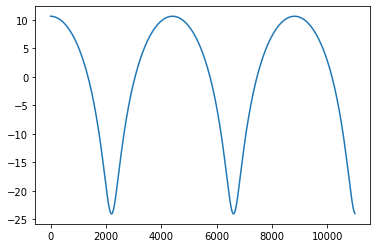

In [8]:
D = 5
a = 0.7


h = get_impulse_response(D, a)

H, W = scipy.signal.freqz(h,fs=samplerate)
plt.plot(H,20*np.log(np.abs(W)+np.finfo(np.float32).eps))

Furthermore, we can plot some differences in frequency domain for original and processed sound

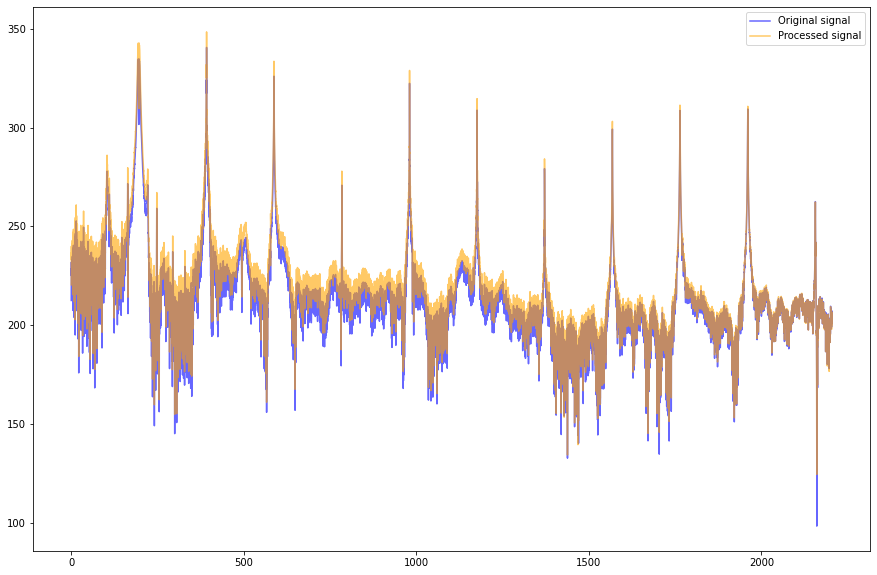

In [9]:
x_fft = fft(data)
x_spectrum_db = 20*np.log(np.abs(x_fft)+np.finfo(np.float32).eps);

s_fft = fft(data_new)
s_spectrum_db = 20*np.log(np.abs(s_fft)+np.finfo(np.float32).eps);
freq_axis = H

N = len(data)
T = 1/samplerate

freqs=fftfreq(N, T)

plt.figure(figsize=(15,10))
plt.plot(freqs[:N//10],x_spectrum_db[:N//10], alpha=0.6, c='blue', label='Original signal')
plt.plot(freqs[:N//10],s_spectrum_db[:N//10], alpha=0.6, c='orange', label='Processed signal')
plt.legend()
plt.show()

### Final comparison
Here is a numerical example that our FIR implementation and Scipy's process the signal in the same manner.


In [10]:
sample = data[:10]#np.array([15, 0, 20, 30, 10, 5, 4, 15, 40, 50])
print('sample', sample)

D = 5
a = 0.1

h = get_impulse_response(D, a)
print('Impulse response', h) #Should be [1.0,0.0,0.0,0.0,0.0,0.1]

sample_scipy = scipy.signal.lfilter(h, 1, sample)
print('scipy', sample_scipy)

sample_cust = FIR(sample, a, D)
print('custom', sample_cust)

sample [111 158 159 155 144 142 122 137 133 133]
Impulse response [1.0, 0, 0, 0, 0, 0.1]
scipy [111.  158.  159.  155.  144.  153.1 137.8 152.9 148.5 147.4]
custom [111.  158.  159.  155.  144.  153.1 137.8 152.9 148.5 147.4]


## Summary

Overall, we have implemented FIR dealy effect for signal. With FIR there were no problems with any kind of instabilities when the alpha (a) parameter was changed. As well as, we have computed impulse and frequency responces for this sound signal.